In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
sns.set_palette('Set2')
rcParams['figure.figsize'] = 8, 8
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [209]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

In [210]:
#import data
with open('DataSet\\Train.csv', 'r') as file:
    train = file.read()
train = pd.read_csv('DataSet\\Train.csv')
test=  pd.read_csv('DataSet\\Test.csv')
submission = pd.read_csv('DataSet\\SampleSubmission.csv')

In [211]:
print(train.head())

                                    user_id       REGION        TENURE  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month   
1  50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month   
3  364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  20000.0            47.0  21602.0        7201.0       52.0       8835.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          NaN   
3   7900.0            19.0   7896.0        2632.0       25.0       9385.0   
4  12350.0            21.0  12351.0        4117.0       29.0       9360.0   

   ON_NET  ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0  3391.0   396.0  185.0    NaN   

In [212]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [213]:
train.shape

(1077024, 19)

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [215]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [216]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [217]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN
190062,9b4f57aeef72cd52c634498d0ea27ea3fbb67bf4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN


In [218]:
test.shape

(190063, 18)

In [219]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [220]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTANT,123695.0,5506.547759,7063.107301,25.0,1000.0,3000.0,7300.0,201500.0
FREQUENCE_RECH,123695.0,11.483940,13.181700,1.0,2.0,7.0,16.0,120.0
REVENUE,126422.0,5486.233417,7130.567766,1.0,1000.0,3000.0,7319.0,177322.0
ARPU_SEGMENT,126422.0,1828.750281,2376.852027,0.0,333.0,1000.0,2440.0,59107.0
FREQUENCE,126422.0,13.939670,14.623402,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,96716.0,3358.421151,12024.079200,0.0,0.0,265.0,2888.0,754798.0
ON_NET,120771.0,281.210613,886.496878,0.0,5.0,27.0,156.0,26786.0
ORANGE,111417.0,94.611639,202.594409,0.0,7.0,28.0,98.0,5695.0
TIGO,76555.0,22.952270,64.902240,0.0,2.0,6.0,20.0,3083.0
ZONE1,14850.0,8.135421,46.050513,0.0,0.0,1.0,3.0,3558.0


In [221]:
missing_values= 100 -((train.notnull().sum()/train.shape[0])*100)
missing_values

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

In [222]:
missing_values= 100 -((test.notnull().sum()/test.shape[0])*100)
missing_values

user_id            0.000000
REGION            39.320120
TENURE             0.000000
MONTANT           34.918948
FREQUENCE_RECH    34.918948
REVENUE           33.484161
ARPU_SEGMENT      33.484161
FREQUENCE         33.484161
DATA_VOLUME       49.113715
ON_NET            36.457385
ORANGE            41.378911
TIGO              59.721250
ZONE1             92.186801
ZONE2             93.680516
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.717746
FREQ_TOP_PACK     41.717746
dtype: float64

REGION
DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: count, dtype: int64


Text(0.5, 0, 'REGION')

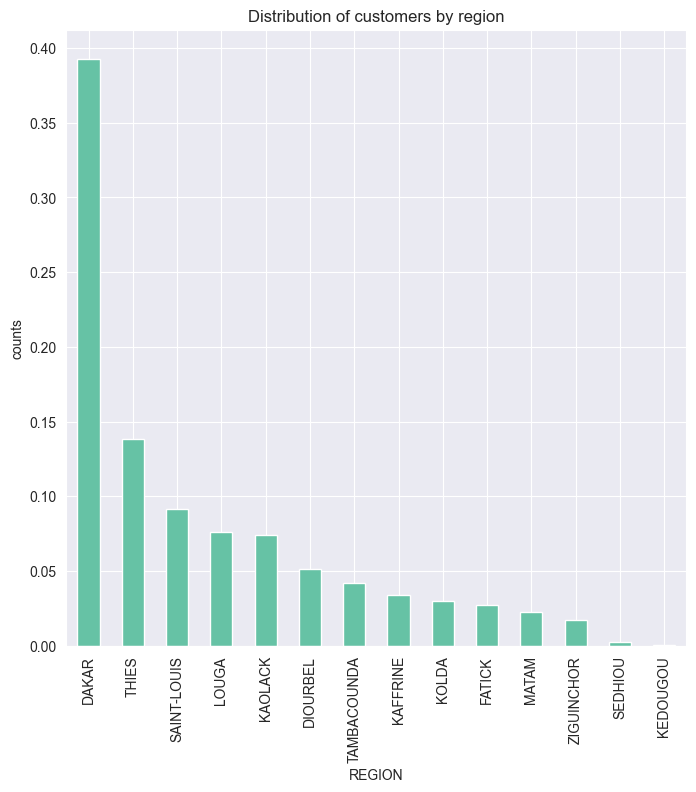

In [223]:
print(train['REGION'].value_counts())
plt.title('Distribution of customers by region')
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

TENURE
K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: count, dtype: int64


Text(0.5, 0, 'TENURE')

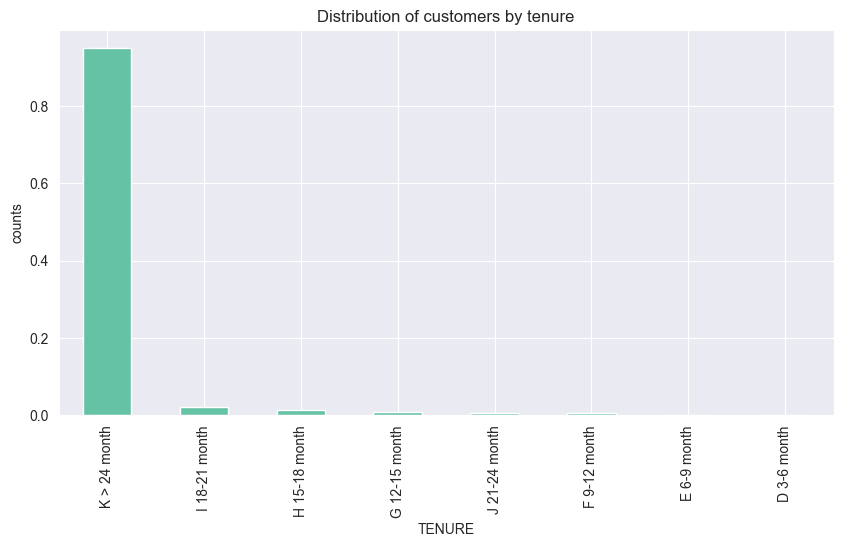

In [224]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
plt.title('Distribution of customers by tenure')
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

MRG
NO    1077024
Name: count, dtype: int64


Text(0.5, 0, 'MRG')

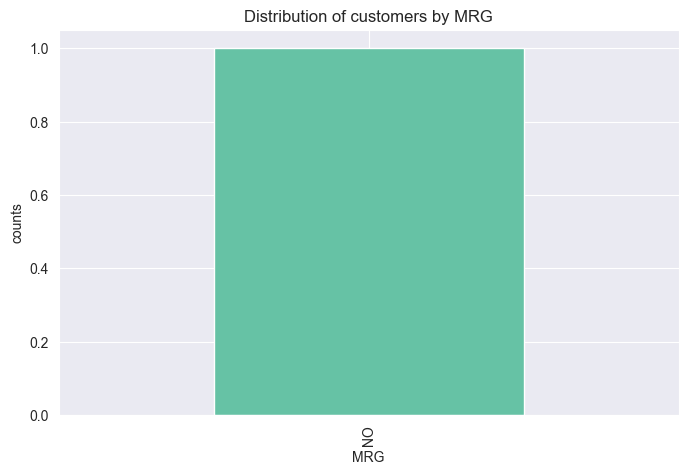

In [225]:
print(train['MRG'].value_counts())
plt.figure(figsize=(8,5))
plt.title('Distribution of customers by MRG')
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

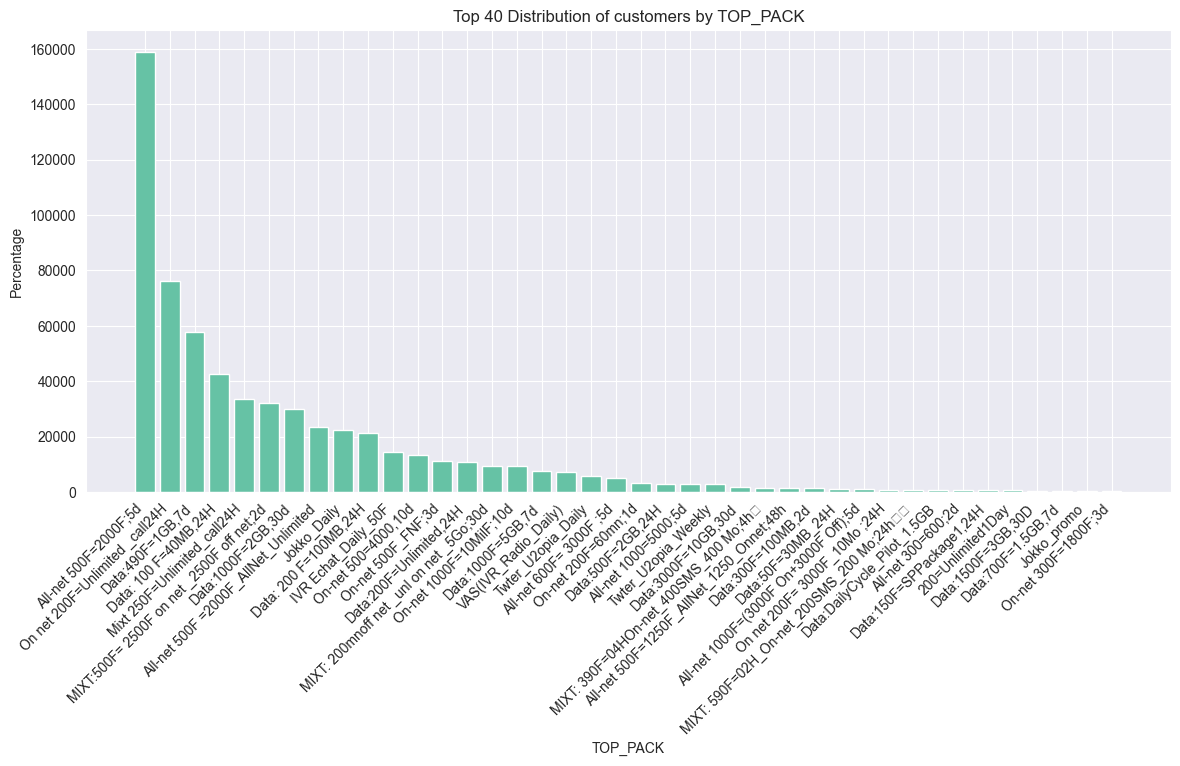

In [226]:
top_n = 40
top_pack_counts = train['TOP_PACK'].value_counts().head(top_n)
plt.figure(figsize=(14, 6))
plt.bar(top_pack_counts.index, top_pack_counts.values)
plt.title(f'Top {top_n} Distribution of customers by TOP_PACK')
plt.ylabel('Percentage')
plt.xlabel('TOP_PACK')
plt.xticks(rotation=45, ha='right')
plt.show()


In [227]:
pd.crosstab(train.CHURN, train.TENURE, normalize= 'index')

TENURE,D 3-6 month,E 6-9 month,F 9-12 month,G 12-15 month,H 15-18 month,I 18-21 month,J 21-24 month,K > 24 month
CHURN,,,,,,,,
0,0.000381,0.000877,0.003953,0.005857,0.010730,0.018637,0.005611,0.953955
1,0.000267,0.000802,0.005669,0.011857,0.017446,0.030625,0.007000,0.926334


Text(0.5, 1.0, 'Distribution of customers who churn by their top amount')

<Figure size 1200x800 with 0 Axes>

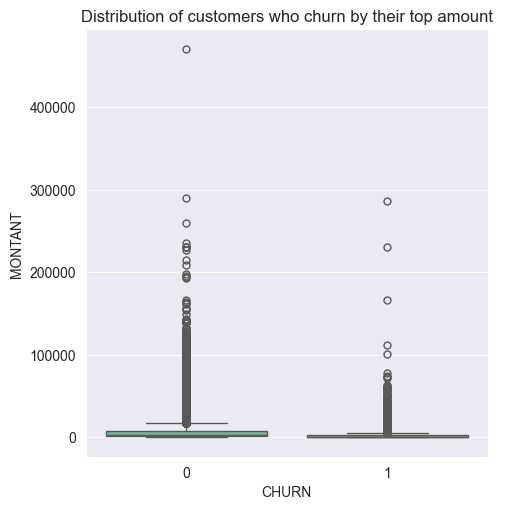

In [228]:
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="MONTANT", kind= 'box', data= train)
plt.title('Distribution of customers who churn by their top amount')

Text(0.5, 1.0, 'Distribution of churn by income')

<Figure size 1200x800 with 0 Axes>

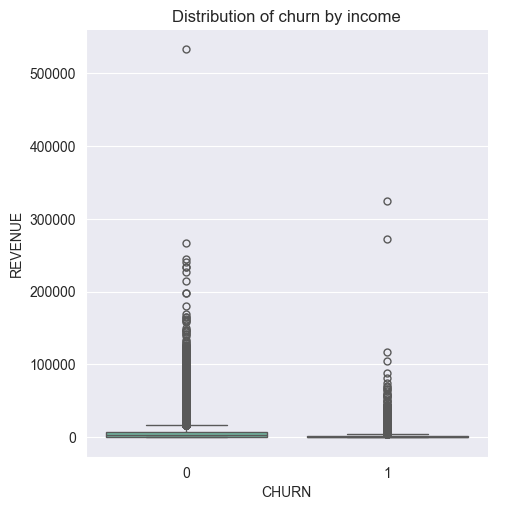

In [229]:
plt.figure(figsize=(12,8))
ax= sns.catplot(x="CHURN", y="REVENUE", kind= 'box', data= train)
plt.title('Distribution of churn by income')

<Axes: >

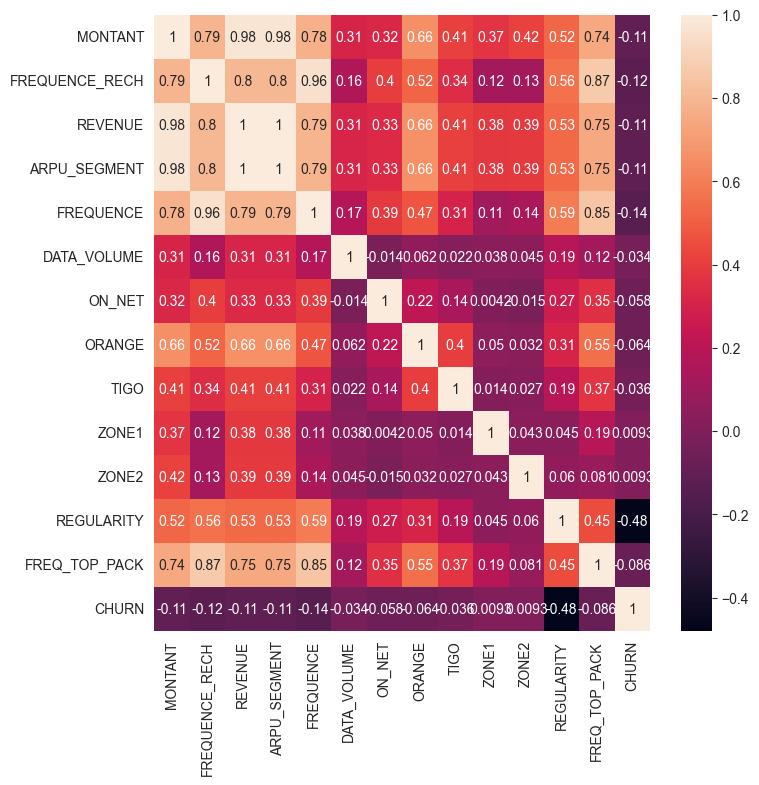

In [230]:
train_numeric = train.select_dtypes(include=[np.number])
sns.heatmap(train_numeric.corr(), annot=True)


CHURN
0    875031
1    201993
Name: count, dtype: int64


Text(0.5, 0, 'Churn')

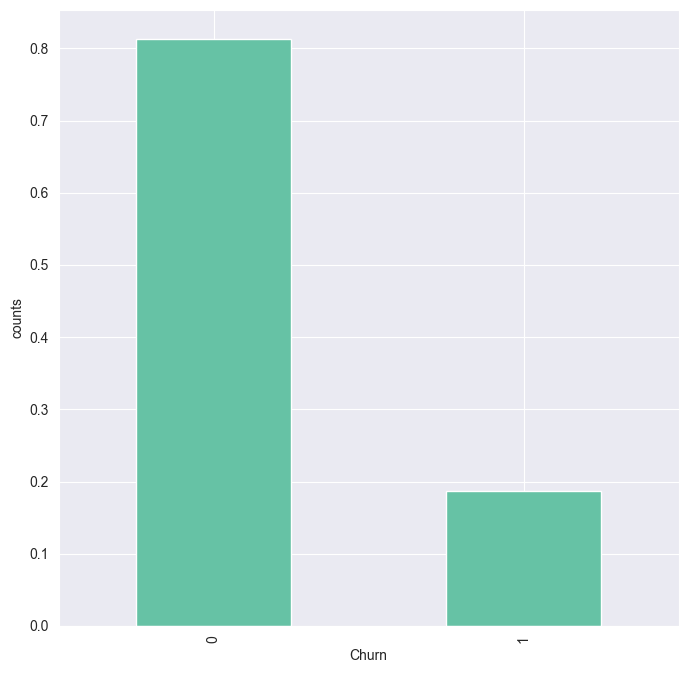

In [231]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

The output indicates that the 'CHURN' column has 875,031 instances of class 0 and 201,993 instances of class 1. This suggests that the dataset is imbalanced, as class 0 significantly outnumbers class 1.

Text(0.5, 1.0, 'Distribution of churn by regularity')

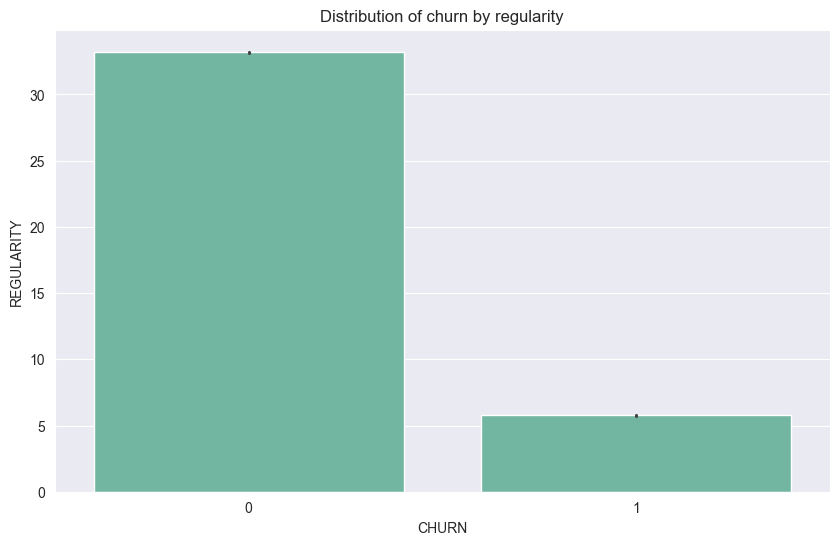

In [232]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'CHURN', y= 'REGULARITY', data= train)
plt.title('Distribution of churn by regularity')

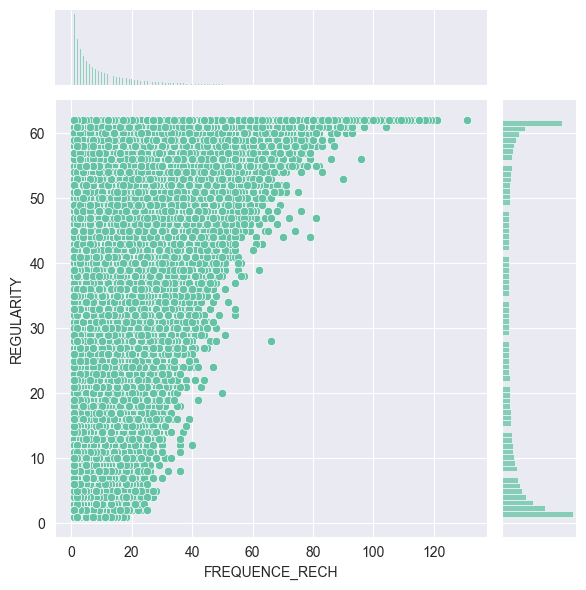

In [233]:
sns.jointplot(x=train.FREQUENCE_RECH, y=train.REGULARITY, data=train)

In [234]:
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [235]:
train.drop(['REGION', 'TOP_PACK', 'MRG'], axis=1, inplace=True)
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [236]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,62,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,61,7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,56,11.0,0


In [237]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,35,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,60,4.0


In [238]:
cols_to_replace = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']
train[cols_to_replace] = train[cols_to_replace].fillna(train[cols_to_replace].mean())
test[cols_to_replace] = test[cols_to_replace].fillna(test[cols_to_replace].mean())


In [239]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0


In [240]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [241]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,8.135421,7.696944,35,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,2,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,8.135421,7.696944,22,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,6,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.000000,7.696944,60,4.000000


In [242]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [243]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [244]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1)
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 14)
(1077024,)
(190063, 14)


In [245]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Resample the data
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.5, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(875031, 14)
(875031,)
(875031, 14)
(875031,)


In [246]:
X_resampled_train, X_resampled_val, y_resampled_train, y_resampled_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=1)


In [247]:
print("Train")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("+"*7)
print("Test")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("+"*7)
print("Validation")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


Train
X_train shape: (875031, 14), y_train shape: (875031,)
+++++++
Test
X_test shape: (875031, 14), y_test shape: (875031,)
+++++++
Validation
X_val shape: (161554, 14), y_val shape: (161554,)


In [248]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [249]:
scaler = StandardScaler()

In [250]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [251]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
347768,K > 24 month,-0.065940,-1.151429,-0.116785,-0.116581,-0.541033,-0.271137,0.026757,-0.675885,0.009329,-0.770605,-0.725719,-0.210758,-1.061350
344705,K > 24 month,1.996668,2.174208,1.996399,1.996399,1.890771,0.015012,0.107805,2.501141,0.245836,-0.001924,-0.001459,1.951058,2.117306
1389171,K > 24 month,-0.703860,-1.036752,-0.675094,-0.674891,-1.047659,0.264813,0.026757,0.025158,-0.682820,-0.001924,-0.001459,-0.116766,-0.928906
1270155,K > 24 month,-1.022820,-1.151429,-0.986858,-0.987071,-0.845008,-0.406094,-0.471184,-0.659799,0.009329,-0.001924,-0.001459,-0.492734,-0.531574
170715,K > 24 month,-0.895236,-0.692720,-0.862651,-0.862448,-0.743683,0.015012,-0.453147,-0.732187,0.009329,-0.001924,-0.537840,0.118214,0.032962


In [252]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [253]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1007238,K > 24 month,0.046591,0.055405,0.053128,0.053128,0.064328,-0.400465,0.026757,0.025158,0.009329,-0.001924,-0.001459,-0.868703,0.032962
615886,K > 24 month,0.046591,0.055405,0.053128,0.053128,0.064328,-0.406344,-0.462166,0.025158,0.009329,-0.001924,-0.001459,-0.492734,0.032962
1039060,K > 24 month,-0.916500,-1.036752,-0.882798,-0.883011,-1.148984,0.015012,-0.453147,-0.370247,-0.652864,-0.001924,-0.001459,1.152126,-0.928906
7712,K > 24 month,0.046591,0.055405,0.053128,0.053128,0.064328,0.015012,0.026757,0.025158,0.009329,-0.001924,-0.001459,-0.680718,0.032962
319548,K > 24 month,-0.714492,-0.004658,-0.707288,-0.707293,-0.135732,-0.184585,-0.471184,-0.724144,0.009329,-0.001924,-0.001459,0.024222,0.130646


In [254]:
test[num_cols] = scaler.transform(test[num_cols])

In [255]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,-0.597540,-0.692720,-0.571242,-0.571454,-0.845008,-0.406344,-0.357551,-0.177213,0.004753,-0.005363,-0.002671,0.729162,-0.531574
1,K > 24 month,0.041772,0.050839,0.049012,0.049012,0.060805,0.013713,0.034233,0.020741,0.004753,-0.005363,-0.002671,-0.821707,0.029237
2,K > 24 month,0.041772,0.050839,0.049012,0.049012,0.060805,-0.406344,0.034233,0.020741,0.004753,-0.005363,-0.002671,0.118214,0.029237
3,K > 24 month,0.041772,0.050839,0.049012,0.049012,0.060805,0.013713,0.034233,0.020741,0.004753,-0.005363,-0.002671,-0.633722,0.029237
4,K > 24 month,-0.044676,-0.463366,0.080327,0.080323,0.168243,0.567121,-0.418877,-0.547196,-0.682820,-0.877851,-0.002671,1.904062,-0.664018


In [256]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [257]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
917325,7,-1.129380,-1.411288,-1.090729,-1.091187,-1.488589,-0.406395,-0.473841,-0.746184,-0.703273,-0.971996,-0.793872,-0.961413,-1.351901
694916,7,-1.129380,-1.411288,-1.090729,-1.091187,-1.488589,-0.406395,-0.473841,-0.746184,-0.703273,-0.971996,-0.793872,-0.960521,-1.367406
1023253,7,-1.129380,-1.411288,-1.090729,-1.091187,-1.488589,-0.406395,-0.473841,-0.746184,-0.703273,-0.971996,-0.793872,-0.961413,-1.351901
584285,7,-1.129381,-1.419336,-1.090729,-1.091188,-1.495441,-0.406395,-0.473842,-0.746208,-0.703273,-0.971996,-0.793872,-0.960124,-1.365529
446284,7,-1.129380,-1.394665,-1.090729,-1.091187,-1.477396,-0.406395,-0.473837,-0.746171,-0.703273,-0.971996,-0.793872,-0.955368,-1.354270


In [258]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [259]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [260]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [261]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
347768,7,-0.065940,-1.151429,-0.116785,-0.116581,-0.541033,-0.271137,0.026757,-0.675885,0.009329,-0.770605,-0.725719,-0.210758,-1.061350
344705,7,1.996668,2.174208,1.996399,1.996399,1.890771,0.015012,0.107805,2.501141,0.245836,-0.001924,-0.001459,1.951058,2.117306
1389171,7,-0.703860,-1.036752,-0.675094,-0.674891,-1.047659,0.264813,0.026757,0.025158,-0.682820,-0.001924,-0.001459,-0.116766,-0.928906
1270155,7,-1.022820,-1.151429,-0.986858,-0.987071,-0.845008,-0.406094,-0.471184,-0.659799,0.009329,-0.001924,-0.001459,-0.492734,-0.531574
170715,7,-0.895236,-0.692720,-0.862651,-0.862448,-0.743683,0.015012,-0.453147,-0.732187,0.009329,-0.001924,-0.537840,0.118214,0.032962


In [262]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score'])
def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_table.loc[model_name] = [model_name, accuracy, recall, f1]
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    
    return model

model = RandomForestClassifier(n_estimators=100, random_state=1)
model = model_evaluation('Random Forest', model, X_train, y_train, X_test, y_test)




In [ ]:
from catboost import CatBoostClassifier
cat = [0]
model = CatBoostClassifier(iterations=10)
model = model_evaluation('CatBoost', model, X_train, y_train, X_test, y_test)

Learning rate set to 0.5
0:	learn: 0.4608633	total: 330ms	remaining: 2.97s
1:	learn: 0.3776436	total: 703ms	remaining: 2.81s
2:	learn: 0.3385190	total: 890ms	remaining: 2.08s
3:	learn: 0.3194754	total: 1.1s	remaining: 1.65s
4:	learn: 0.3090138	total: 1.23s	remaining: 1.23s
5:	learn: 0.3035161	total: 1.32s	remaining: 878ms
6:	learn: 0.3004095	total: 1.43s	remaining: 612ms
7:	learn: 0.2988924	total: 1.5s	remaining: 375ms
8:	learn: 0.2978600	total: 1.58s	remaining: 176ms
9:	learn: 0.2972985	total: 1.66s	remaining: 0us
Model: CatBoost
Accuracy: 0.8648739489556407
Recall: 0.5557355832403007
F1 Score: 0.60723596500224
              precision    recall  f1-score   support

           0       0.90      0.94      0.92    437293
           1       0.67      0.56      0.61    101219

    accuracy                           0.86    538512
   macro avg       0.79      0.75      0.76    538512
weighted avg       0.86      0.86      0.86    538512



In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model_evaluation('XGBoost', model, X_train, y_train, X_test, y_test)


Model: XGBoost
Accuracy: 0.8650875003713938
Recall: 0.5544512393918138
F1 Score: 0.6070613432561359
              precision    recall  f1-score   support

           0       0.90      0.94      0.92    437293
           1       0.67      0.55      0.61    101219

    accuracy                           0.87    538512
   macro avg       0.79      0.75      0.76    538512
weighted avg       0.86      0.87      0.86    538512



In [ ]:
model = DecisionTreeClassifier()
model = model_evaluation('Decision Tree', model, X_train, y_train, X_test, y_test)

Model: Decision Tree
Accuracy: 0.836592313634608
Recall: 0.5898398522016618
F1 Score: 0.5757197340443485
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    437293
           1       0.56      0.59      0.58    101219

    accuracy                           0.84    538512
   macro avg       0.73      0.74      0.74    538512
weighted avg       0.84      0.84      0.84    538512



In [ ]:
model_table = model_table.sort_values(by='F1 Score', ascending=False)
model_table

,Model,Accuracy,Recall,F1 Score
CatBoost,CatBoost,0.864874,0.555736,0.607236
XGBoost,XGBoost,0.865088,0.554451,0.607061
Random Forest,Random Forest,0.860423,0.569508,0.605343
Decision Tree,Decision Tree,0.836592,0.589840,0.575720


Among these models, CatBoost and XGBoost performed similarly in terms of Accuracy and F1 Score, with CatBoost showing slightly better results in Recall. Random Forest performed slightly worse than CatBoost and XGBoost in terms of Accuracy but had a higher Recall. Decision Tree had the lowest performance across all metrics.

In [ ]:
import joblib

joblib.dump(CatBoostClassifier(iterations=10), 'catboost_model.pkl')
joblib.dump(RandomForestClassifier(n_estimators=100, random_state=1), 'random_forest_model.pkl')
joblib.dump(XGBClassifier(), 'xgboost_model.pkl')
joblib.dump(DecisionTreeClassifier(), 'decision_tree_model.pkl')



['decision_tree_model.pkl']

In [ ]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [ ]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,5,-0.529404,-0.611105,-0.514765,-0.514940,-0.751139,-0.348940,-0.307224,-0.162343,-0.001634,-0.002870,0.000606,0.312061,-0.455791
1,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-1.168544,-0.002799
2,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.348940,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.271208,-0.002799
3,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.989077,-0.002799
4,7,-0.075902,-0.423506,0.021836,0.021834,0.085837,0.453446,-0.356267,-0.458218,-0.586660,-0.729836,0.000606,1.433731,-0.562771


In [ ]:
subpred = randmodel.predict(test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.7s finished


In [ ]:
subpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
submission["CHURN"] = subpred

In [ ]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [ ]:
submission.to_csv('starter_code_submission.csv', index=False)